In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import mixture
import pandas as pd
from sklearn.metrics import accuracy_score
import cv2

## A

In [26]:
df = pd.read_csv("Skin-NonSkin.csv",delimiter='\t')
labeldata = df['1']
data = df.drop(columns='1')
js = df[df['1']==1]
js = js.drop(columns='1')

In [27]:
classifiers = dict((covar_type, mixture.GaussianMixture(n_components=6,max_iter=3500000,random_state=1,covariance_type=covar_type, init_params='kmeans'))for covar_type in ['spherical', 'diag', 'tied', 'full'])
classifiers

{'spherical': GaussianMixture(covariance_type='spherical', max_iter=3500000, n_components=6,
                 random_state=1),
 'diag': GaussianMixture(covariance_type='diag', max_iter=3500000, n_components=6,
                 random_state=1),
 'tied': GaussianMixture(covariance_type='tied', max_iter=3500000, n_components=6,
                 random_state=1),
 'full': GaussianMixture(max_iter=3500000, n_components=6, random_state=1)}

In [28]:
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(data)
    predicts = classifier.predict(js)
    lable,itera = np.unique(predicts, return_counts = True)
    s_label = lable[itera == itera.max()]
    print(f'{lable[itera == itera.max()]} : {itera.max()}')
GMM = mixture.GaussianMixture(max_iter=3500000, n_components=6, random_state=20)
GMM.fit(data)
s_label=lable[itera == itera.max()]

[2] : 31611
[2] : 31748
[2] : 35625
[2] : 44142


## B

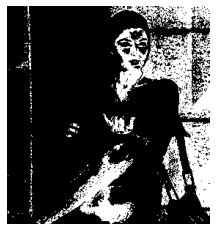

[[56984 11926]
 [ 7606  6030]]
accuracy is:
0.7633804181910693


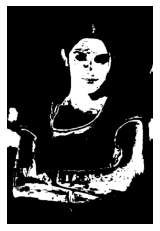

[[283890  14569]
 [ 52256  52285]]
accuracy is:
0.834181141439206


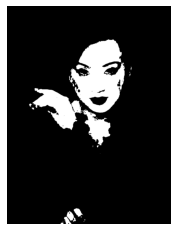

[[514399    537]
 [ 24992  67572]]
accuracy is:
0.9579769547325103


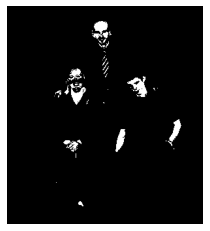

[[95775   225]
 [ 1632  2268]]
accuracy is:
0.9814114114114114


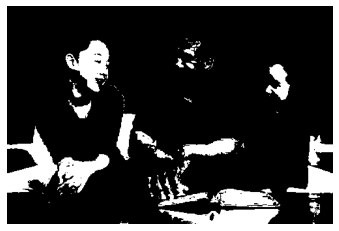

[[131432      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0  12959]
 [     1      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [     6      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [     4      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0 

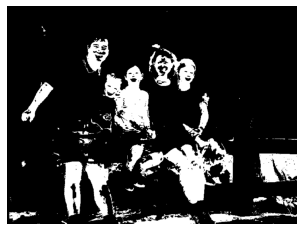

[[395080  29875]
 [ 10757  44288]]
accuracy is:
0.91535


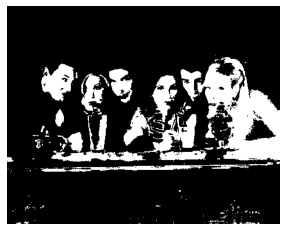

[[137440      0      0      0      0      0      0  16456]
 [     1      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [     2      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [  6954      0      0      0      0      0      0  15393]]
accuracy is:
0.8671375886524822


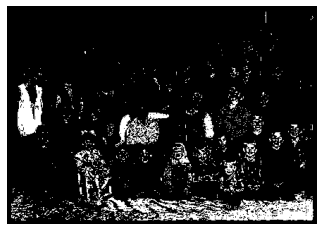

[[110690      0  11082]
 [     1      0      0]
 [ 12563      0   1624]]
accuracy is:
0.826081200353045


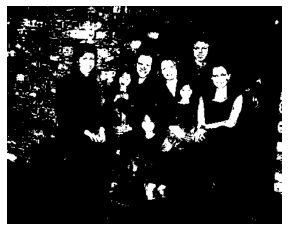

[[143464   7064]
 [  3258   8841]]
accuracy is:
0.9365296045552092


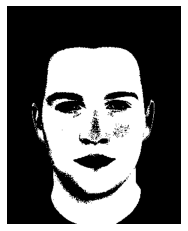

[[76537  1036]
 [ 6153 44274]]
accuracy is:
0.9438359375


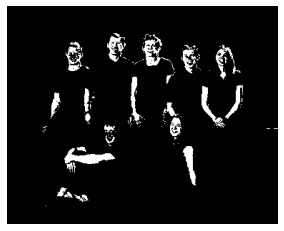

[[106002    636]
 [  3430   5527]]
accuracy is:
0.9648254682295947


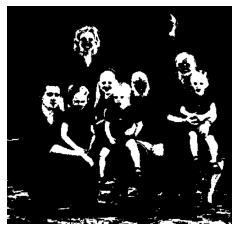

[[125965   5453]
 [ 11066  12316]]
accuracy is:
0.8932881136950904


In [29]:
for filename in os.listdir('Untitled Folder 2'):
    if filename.replace(filename[:-3],'')=='jpg':
        r_image = cv2.imread(os.path.join('Untitled Folder 2',filename))
        g_image = cv2.imread(os.path.join('Untitled Folder 2',(filename[:-3]+'png')))
        k,z,_ = np.shape(r_image)
        size = k*z
        rnew = [None] * size
        np.unique(GMM.predict(np.ravel(r_image).reshape(size, -1)))
        u,c = np.unique(GMM.predict(np.ravel(r_image).reshape(size, -1)), return_counts = True)
        n_image = [None] * size
        predicts = []
        predicts = GMM.predict(np.ravel(r_image).reshape(size, -1))
        for i in range(len(predicts)):
            if predicts[i] == s_label:
                n_image[i] = [255,255,255]
            else:
                n_image[i] = [0,0,0]
        for i in range(len(predicts)):
            if predicts[i] == s_label:
                rnew[i] = 255
            else:
                rnew[i] = 0
        plt.axis("off")
        plt.imshow(np.array(n_image).reshape(k,z,3))
        plt.show()
        grand_trurh =[]
        for i in range(np.shape(g_image)[0]):
            for j in range(np.shape(g_image)[1]):
                grand_trurh+=[int(g_image[i][j][1])]
        print(confusion_matrix(grand_trurh, rnew))
        print('accuracy is:')
        print(accuracy_score(grand_trurh, rnew))

## C

In [21]:
gnb = GaussianNB()
gnb.fit(data, labeldata)

GaussianNB()

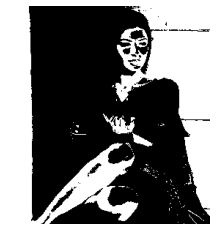

[[24342 44568]
 [ 7715  5921]]
accuracy is:
0.36661982409807864


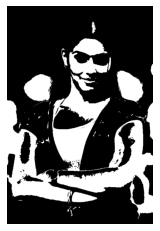

[[ 53675 244784]
 [ 64516  40025]]
accuracy is:
0.2325062034739454


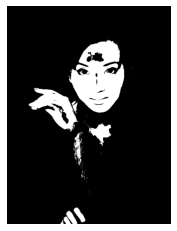

[[  4534 510402]
 [ 62742  29822]]
accuracy is:
0.05655308641975309


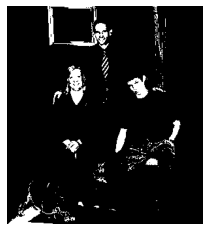

[[ 3001 92999]
 [ 2864  1036]]
accuracy is:
0.04041041041041041


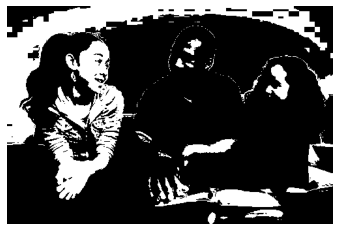

[[ 29000      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0 115391]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      1]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      6]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      4]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0 

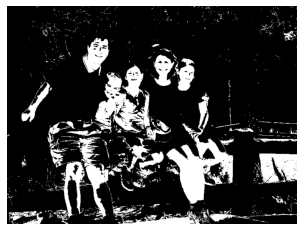

[[ 43320 381635]
 [ 40902  14143]]
accuracy is:
0.11971458333333333


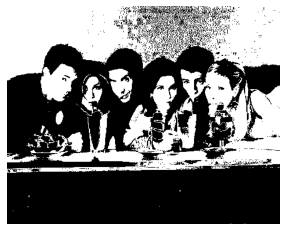

[[59002     0     0     0     0     0     0 94894]
 [    0     0     0     0     0     0     0     1]
 [    0     0     0     0     0     0     0     1]
 [    0     0     0     0     0     0     0     1]
 [    0     0     0     0     0     0     0     1]
 [    0     0     0     0     0     0     0     2]
 [    0     0     0     0     0     0     0     1]
 [15492     0     0     0     0     0     0  6855]]
accuracy is:
0.3736567375886525


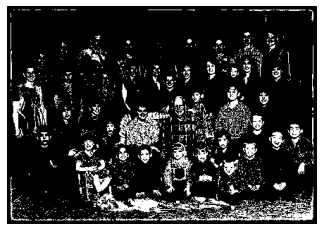

[[ 11482      0 110290]
 [     0      0      1]
 [  6545      0   7642]]
accuracy is:
0.14065901735804648


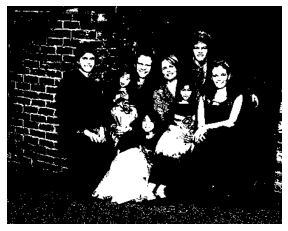

[[ 13808 136720]
 [  8321   3778]]
accuracy is:
0.10813702521721485


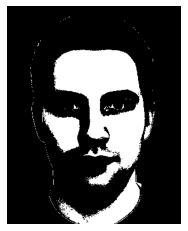

[[  412 77161]
 [28502 21925]]
accuracy is:
0.1745078125


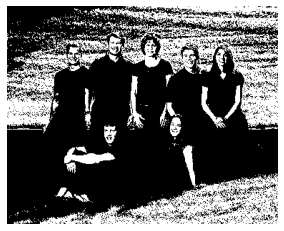

[[30288 76350]
 [ 5959  2998]]
accuracy is:
0.2879536312124227


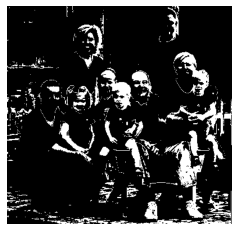

[[ 12800 118618]
 [  7325  16057]]
accuracy is:
0.18641472868217054


In [23]:
for filename in os.listdir('Untitled Folder 2'):
    if filename.replace(filename[:-3],'')=='jpg':
        r_image = cv2.imread(os.path.join('Untitled Folder 2',filename))
        g_image = cv2.imread(os.path.join('Untitled Folder 2',(filename[:-3]+'png')))
        k,z,_ = np.shape(r_image)
        size = k*z
        rnew = [None] * size
        np.unique(GMM.predict(np.ravel(r_image).reshape(size, -1)))
        u,c = np.unique(GMM.predict(np.ravel(r_image).reshape(size, -1)), return_counts = True)
        n_image = [None] * size
        predicts = []
        predicts = gnb.predict(np.ravel(r_image).reshape(size, -1))
        for i in range(len(predicts)):
            if predicts[i] == s_label:
                n_image[i] = [0,0,0]
            else:
                n_image[i] = [255,255,255]
        for i in range(len(predicts)):
            if predicts[i] == s_label:
                rnew[i] = 255
            else:
                rnew[i] = 0
        plt.axis("off")
        plt.imshow(np.array(n_image).reshape(k,z,3))
        plt.show()
        grand_trurh =[]
        for i in range(np.shape(g_image)[0]):
            for j in range(np.shape(g_image)[1]):
                grand_trurh+=[int(g_image[i][j][1])]
        print(confusion_matrix(grand_trurh, rnew))
        print('accuracy is:')
        print(accuracy_score(grand_trurh, rnew))

## D

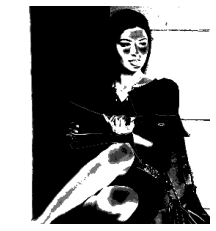

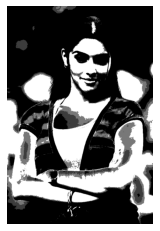

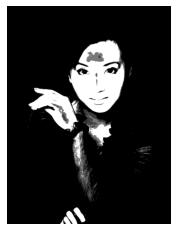

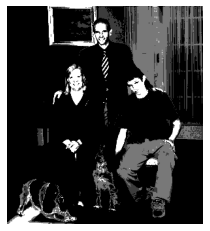

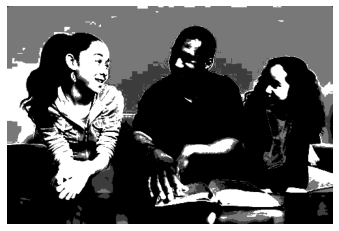

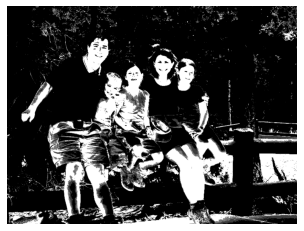

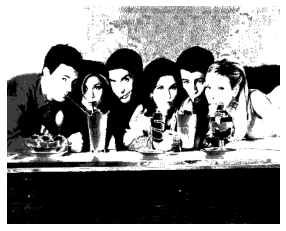

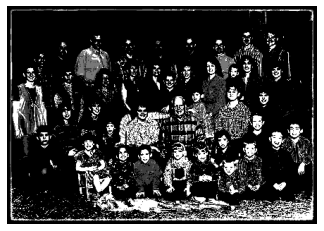

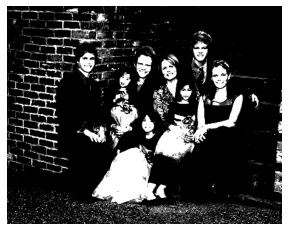

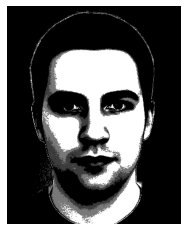

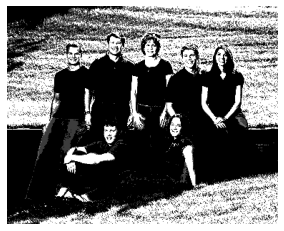

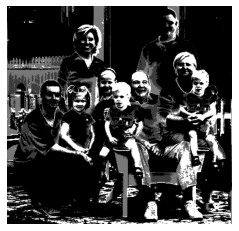

In [33]:
for filename in os.listdir('inputs/D2'):
    if filename.replace(filename[:-3],'')=='jpg':
        r_image = cv2.imread(os.path.join('inputs/D2',filename))
        k,z,_ = np.shape(r_image)
        size = k*z
        n_image = [None] * size
        predicted_array = gnb.predict_proba(np.ravel(r_image).reshape(size, -1))
        for i in range(len(predicted_array)):
            if .8<= predicted_array[i][1] and predicted_array[i][0]<= 1:
                n_image[i] = [0,0,0]
            elif .64<= predicted_array[i][1] and predicted_array[i][0]<= .80:
                n_image[i] = [60,60,60]
            elif .48<= predicted_array[i][1] and predicted_array[i][0]<= .64:
                n_image[i] = [120,120,120]
            elif .32<= predicted_array[i][1] and predicted_array[i][0]<= .48:
                n_image[i] = [180,180,180]
            elif .16<= predicted_array[i][1] and predicted_array[i][0]<= .32:
                n_image[i] = [200,200,200]
            else :
                n_image[i] = [255,255,255]

        plt.axis("off")
        plt.imshow(np.array(n_image).reshape(x,z,3))
        plt.show()

## E

In [7]:
grand_trurh = []
new_data = []
for filename in os.listdir('Untitled Folder'):
    if filename.replace(filename[:-3],'')=='jpg':
        r_image = cv2.imread(os.path.join('Untitled Folder',filename))
        g_image = cv2.imread(os.path.join('Untitled Folder 1',(filename[:-3]+'png')))
        predicted = gnb.predict_proba(r_image.reshape(-1, 1))
        for i in range(np.shape(r_image)[0]):
            for j in range(np.shape(r_image)[1]):
                ndata = np.zeros(12)
                ndata[0] = r_image[i][j][0]
                ndata[1] = r_image[i][j][1]
                ndata[2] = r_image[i][j][2]
                ndata[3] = predicted[i*np.shape(r_image)[1]+1][1]
                
                if ((i-1)>=0) and ((j-1)>=0):
                    
                    ndata[4] = predicted[(i-1)*np.shape(r_image)[1]+(j-1)][1]
                    
                if ((i-1)>=0) and ((j)>=0):
                    
                    ndata[5] = predicted[(i-1)*np.shape(r_image)[1]+(j)][1]
                    
                if ((i-1)>=0) and ((j+1)<=np.shape(r_image)[1]):
                    
                    ndata[6] = predicted[(i-1)*np.shape(r_image)[1]+(j+1)][1]
                    
                if ((i)>=0) and ((j+1)<=np.shape(r_image)[1]):
                    
                    ndata[7] = predicted[(i)*np.shape(r_image)[1]+(j+1)][1]
                    
                if ((i+1)<=np.shape(r_image)[0]) and ((j+1)<=np.shape(r_image)[1]):
                    
                    ndata[8] = predicted[(i+1)*np.shape(r_image)[1]+(j+1)][1]
                    
                if ((i+1)<=np.shape(r_image)[0]) and ((j<np.shape(r_image)[1])):
                    
                    ndata[9] = predicted[(i+1)*np.shape(r_image)[1]+(j)][1]
                    
                if ((i+1)<=np.shape(r_image)[0]) and ((j-1)>=0):
                    
                    ndata[10] = predicted[(i+1)*np.shape(r_image)[1]+(j-1)][1]
                    
                if ((i)<=np.shape(r_image)[0]) and ((j-1>=0)):
                    
                    ndata[11] = predicted[(i)*np.shape(r_image)[1]+(j-1)][1]
                    
                new_data+=[ndata]
                grand_trurh+=[int(g_image[i][j][1])]
        

## G

In [8]:
clf = LogisticRegression(random_state=20)
clf.fit(new_data, grand_trurh)

LogisticRegression(random_state=20)

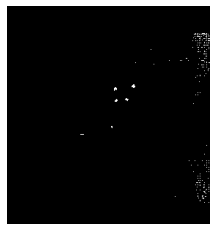

confusion matrix is:
[[68629   281]
 [13634     2]]
accuracy is:
0.8314273253700967


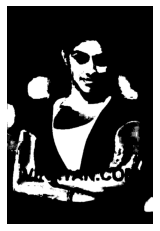

confusion matrix is:
[[269547  28912]
 [ 59736  44805]]
accuracy is:
0.780029776674938


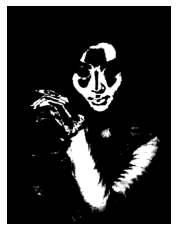

confusion matrix is:
[[472231  42705]
 [ 68418  24146]]
accuracy is:
0.8170814814814815


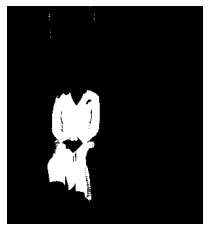

confusion matrix is:
[[87748  8252]
 [ 3900     0]]
accuracy is:
0.8783583583583584


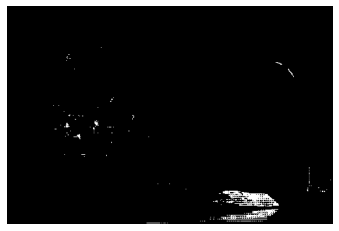

confusion matrix is:
[[142591      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0   1800]
 [     1      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [     6      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [     4      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0 

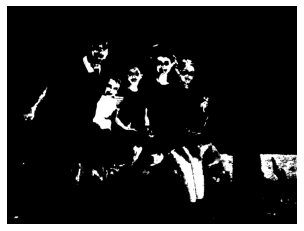

confusion matrix is:
[[414423  10532]
 [ 37615  17430]]
accuracy is:
0.89969375


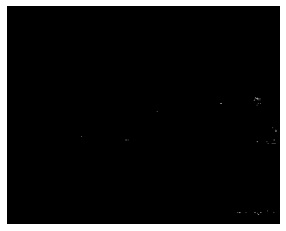

confusion matrix is:
[[153878      0      0      0      0      0      0     18]
 [     1      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [     2      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0]
 [ 22313      0      0      0      0      0      0     34]]
accuracy is:
0.8732595744680851


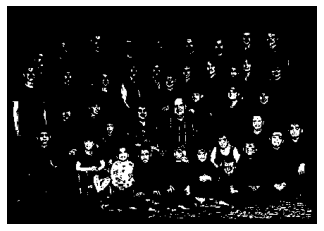

confusion matrix is:
[[119293      0   2479]
 [     1      0      0]
 [  9316      0   4871]]
accuracy is:
0.9132391879964695


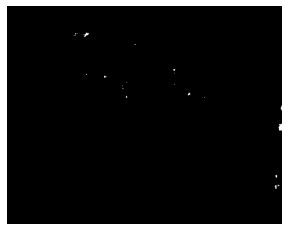

confusion matrix is:
[[150392    136]
 [ 12068     31]]
accuracy is:
0.9249571104429154


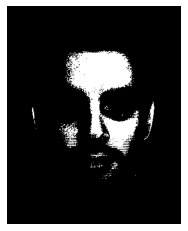

confusion matrix is:
[[77522    51]
 [38060 12367]]
accuracy is:
0.7022578125


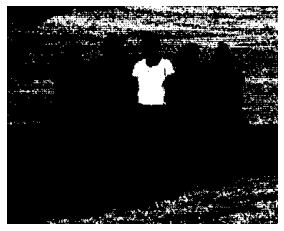

confusion matrix is:
[[94714 11924]
 [ 8952     5]]
accuracy is:
0.8194039534581946


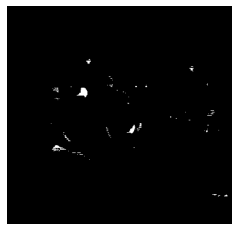

confusion matrix is:
[[131205    213]
 [ 22903    479]]
accuracy is:
0.850671834625323


In [48]:
for filename in os.listdir('inputs/D2'):
    new_data = []
    grand_trurh=[]
    if filename.replace(filename[:-3],'')=='jpg':
        r_image = cv2.imread(os.path.join('inputs/D2',filename))
        g_image = cv2.imread(os.path.join('inputs/D2',(filename[:-3]+'png')))
        predicted = gnb.predict_proba(r_image.reshape(-1, 1))
        for i in range(np.shape(r_image)[0]):
            for j in range(np.shape(r_image)[1]):
                ndata = np.zeros(12)
                ndata[0] = r_image[i][j][0]
                ndata[1] = r_image[i][j][1]
                ndata[2] = r_image[i][j][2]
                ndata[3] = predicted[i*np.shape(r_image)[1]+1][1]
                
                if ((i-1)>=0) and ((j-1)>=0):
                    
                    ndata[4] = predicted[(i-1)*np.shape(r_image)[1]+(j-1)][1]
                    
                if ((i-1)>=0) and ((j)>=0):
                    
                    ndata[5] = predicted[(i-1)*np.shape(r_image)[1]+(j)][1]
                    
                if ((i-1)>=0) and ((j+1)<=np.shape(r_image)[1]):
                    
                    ndata[6] = predicted[(i-1)*np.shape(r_image)[1]+(j+1)][1]
                    
                if ((i)>=0) and ((j+1)<=np.shape(r_image)[1]):
                    
                    ndata[7] = predicted[(i)*np.shape(r_image)[1]+(j+1)][1]
                    
                if ((i+1)<=np.shape(r_image)[0]) and ((j+1)<=np.shape(r_image)[1]):
                    
                    ndata[8] = predicted[(i+1)*np.shape(r_image)[1]+(j+1)][1]
                    
                if ((i+1)<=np.shape(r_image)[0]) and ((j<np.shape(r_image)[1])):
                    
                    ndata[9] = predicted[(i+1)*np.shape(r_image)[1]+(j)][1]
                    
                if ((i+1)<=np.shape(r_image)[0]) and ((j-1)>=0):
                    
                    ndata[10] = predicted[(i+1)*np.shape(r_image)[1]+(j-1)][1]
                    
                if ((i)<=np.shape(r_image)[0]) and ((j-1>=0)):
                    
                    ndata[11] = predicted[(i)*np.shape(r_image)[1]+(j-1)][1]
                    
                new_data+=[nfv]
                grand_trurh+=[int(g_image[i][j][1])]
        
        predicts = clf.predict(new_data)
        a = range(len(predicts))
        k,z,_ = np.shape(r_image)
        size = k*z
        n_image = [None] * size
        for l in a:
            if predicts[l] != 0:
                n_image[l] = [255,255,255]
            else:
                n_image[l] = [0,0,0]
        plt.axis("off")
        plt.imshow(np.array(n_image).reshape(k,z,3))
        plt.show()
        print('confusion matrix is:')
        print(confusion_matrix(grand_trurh, predicts))
        print('accuracy is:')
        print(accuracy_score(grand_trurh, predicts))